<a href="https://colab.research.google.com/github/pratibhaGogi/hello/blob/master/heartdiseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [0]:
import pandas as pd
import io
Data = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
print(Data.head(20))



    age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0    63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1    37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2    41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3    56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4    57    0   0       120   354    0  ...      1      0.6      2   0     2       1
5    57    1   0       140   192    0  ...      0      0.4      1   0     1       1
6    56    0   1       140   294    0  ...      0      1.3      1   0     2       1
7    44    1   1       120   263    0  ...      0      0.0      2   0     3       1
8    52    1   2       172   199    1  ...      0      0.5      2   0     3       1
9    57    1   2       150   168    0  ...      0      1.6      2   0     2       1
10   54    1   0       140   239    0  ...      0      1.2      2   0     2 

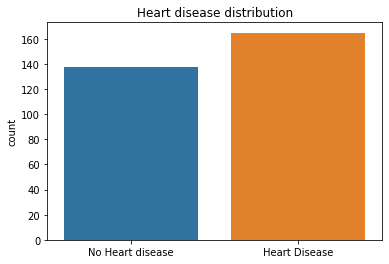

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

f = sns.countplot(x='target', data=Data)
f.set_title("Heart disease distribution")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");


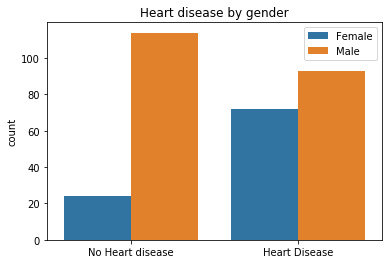

In [0]:
f = sns.countplot(x='target', data=Data, hue='sex')
plt.legend(['Female', 'Male'])
f.set_title("Heart disease by gender")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

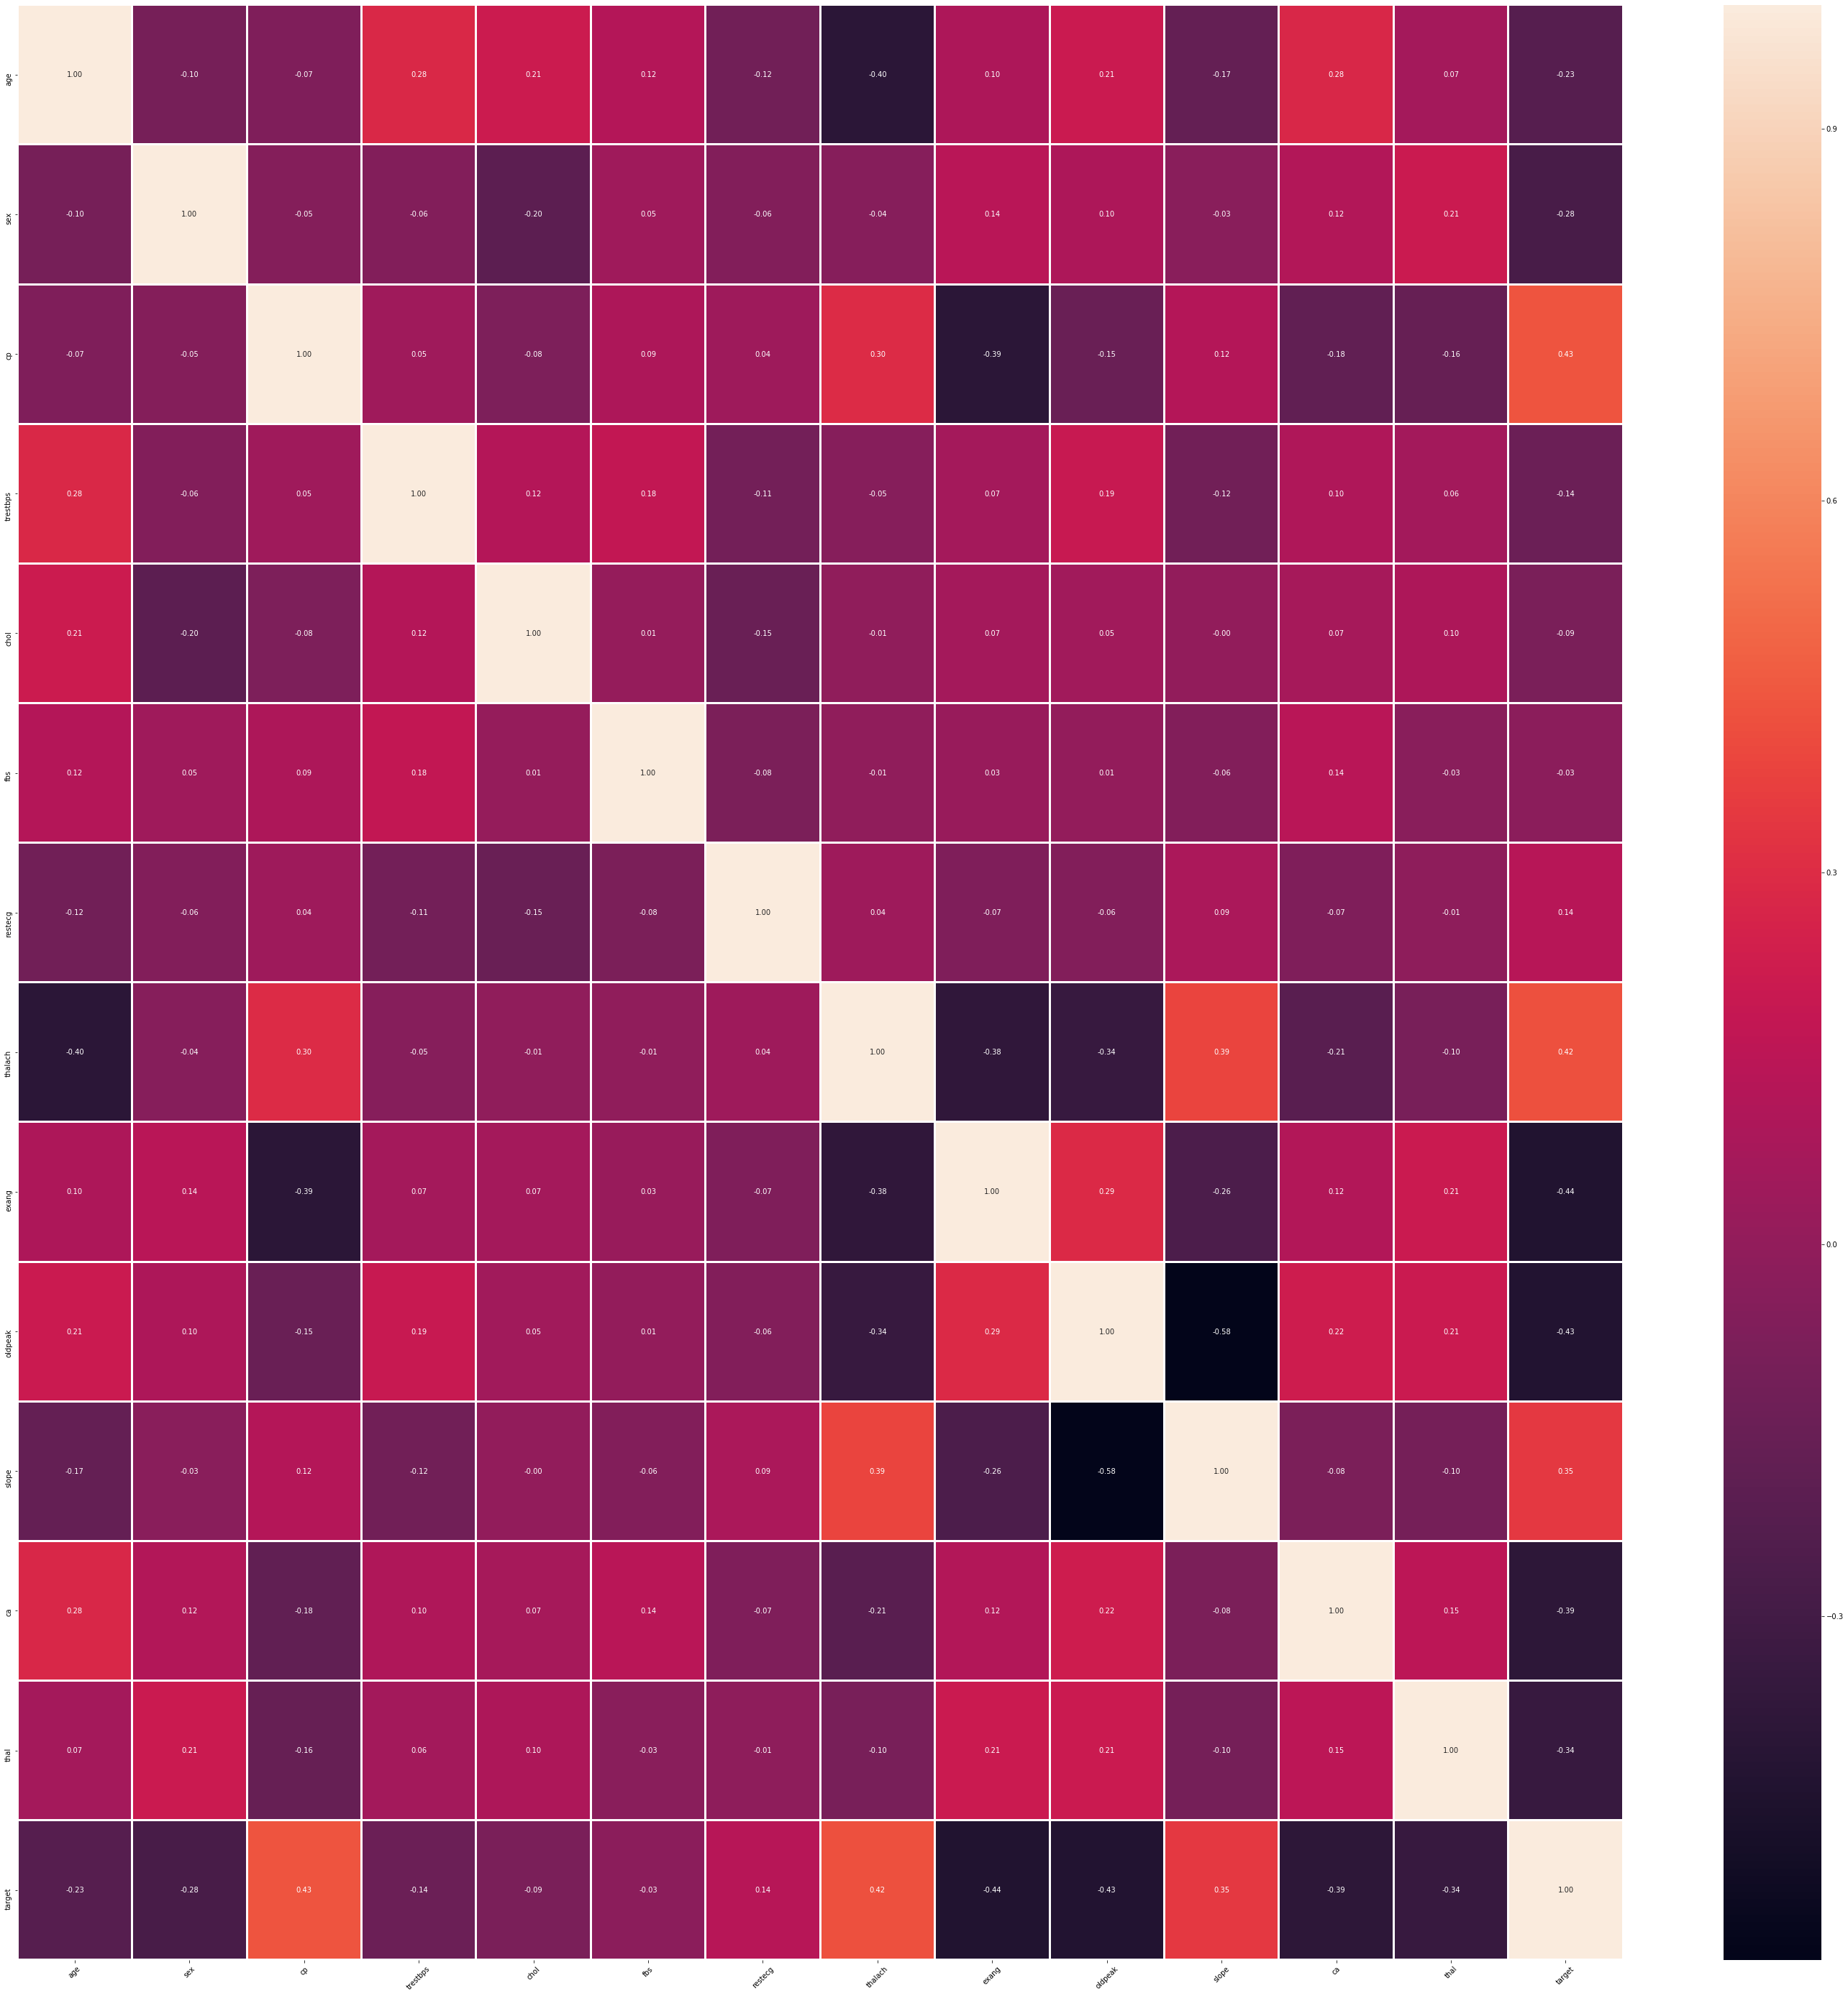

In [0]:

heat_map = sns.heatmap(Data.corr(method='pearson'), annot=True, fmt='.2f', linewidths=2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45);
plt.rcParams["figure.figsize"] = (50,50)

In [22]:
from sklearn.model_selection import train_test_split
import numpy as np
hdata= np.column_stack([Data['age'],Data['sex'],Data['cp'],Data['trestbps'],Data['chol'],Data['fbs'],Data['restecg'],Data['thalach'],Data['exang'],Data['oldpeak'],Data['slope'],Data['ca'],Data['thal']])
X_train,X_test,y_train,y_test = train_test_split(hdata,Data['target'],test_size=0.30,random_state=0)
print("X train Shape",X_train.shape)
print("Y train Shape ",y_train.shape)
print("X Test",X_test.shape)
print("Y Test",y_test.shape)

X train Shape (212, 13)
Y train Shape  (212,)
X Test (91, 13)
Y Test (91,)


In [0]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(30, input_dim=13, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





212/212 [==============================] - 1s 3ms/step - loss: 0.7212 - acc: 0.4245
Epoch 2/100
212/212 [==============================] - 0s 61us/step - loss: 0.6983 - acc: 0.5236
Epoch 3/100
212/212 [==============================] - 0s 59us/step - loss: 0.6842 - acc: 0.5613
Epoch 4/100
212/212 [==============================] - 0s 56us/step - loss: 0.6750 - acc: 0.5708
Epoch 5/100
212/212 [==============================] - 0s 59us/step - loss: 0.6662 - acc: 0.5708
Epoch 6/100
212/212 [==============================] - 0s 60us/step - loss: 0.6588 - acc: 0.5708
Epoch 7/100
212/212 [==============================] - 0s 64us/step - loss: 0.6526 - acc: 0.5849
Epoch 8/100
212/212 [==============================] - 0s 65us/step - loss: 0.6483 - acc: 0.6557
Epoch 9/100
212/212 [==============================] - 0s 61us/step - loss: 0.6425 - acc: 0.6792
Epoch 10/100
212/212 [==

In [25]:
model.summary()
score = model.evaluate(X_test, y_test, verbose=0)
print('Model Accuracy = ',score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________
Model Accuracy =  0.7142857090457455
